<a href="https://colab.research.google.com/github/VZhigalov/Huawei_Sirius_Group2020/blob/master/GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from math import log10
import numpy as np
import matplotlib.pyplot as plt
from random import randrange, gauss
from numpy.random import randint
from random import random as rnd

x = np.load('sample_data/lte_2c_data0_in.npy')
y = np.load('sample_data/lte_2c_data0_out.npy')

d = y - x


def NMSE(gene):

    mem = len(gene[0])
    ORD = 5
    U = np.zeros((len(d), mem*(ORD+1)), dtype = complex)

    ind = np.arange(len(d))
    for k in ind:
        for m in range(mem):
            if k - gene[0][m]>=0 and  k - gene[1][m]>=0 and  k - gene[0][m]<len(x) and k - gene[1][m]<len(x):
                for p in range(ORD+1):
                    U[k, p+m*(ORD+1) ] = x[k - gene[0][m]] * abs(x[k - gene[1][m]])**p   
    
    Rxx = np.matmul(np.conj(U.T), U)
    rdy = np.matmul(np.conj(U.T), d)

    w = np.matmul(np.linalg.pinv(Rxx),rdy)

    z = np.matmul(U, w)
    return 20*log10(np.linalg.norm(d-z)/np.linalg.norm(x))

c=16
D = population(c, 5, 5, -5)
K = sorted(D.keys())  
#print(K)







In [ ]:
for _ in range(8):
    D1 = np.zeros((c,2,5),dtype = int)
    Loss = np.zeros(c)

    for i in range(c//2):
        ind1 = randrange(1,4)
        ind2 = randrange(1,4)

        D1[2*i][0][0:ind1] = D[K[2*i]][0][0:ind1]
        D1[2*i][0][ind1:] = D[K[2*i+1]][0][ind1:]
        D1[2*i][1][0:ind2] = D[K[2*i]][1][0:ind2]
        D1[2*i][1][ind2:] = D[K[2*i+1]][1][ind2:]
        r = randrange(0,5)
        D1[2*i][0][r] += round(gauss(0,1))
        r = randrange(0,5)
        D1[2*i][1][r] += round(gauss(0,1))
        Loss[2*i]=NMSE(D1[2*i])

        D1[2*i+1][0][0:ind1] = D[K[2*i+1]][0][0:ind1]
        D1[2*i+1][0][ind1:] = D[K[2*i]][0][ind1:]
        D1[2*i+1][1][0:ind2] = D[K[2*i+1]][1][0:ind2]
        D1[2*i+1][1][ind2:] = D[K[2*i]][1][ind2:]    
        r = randrange(0,5)
        D1[2*i+1][0][r] += round(gauss(0,1))
        r = randrange(0,5)
        D1[2*i+1][1][r] += round(gauss(0,1))
        Loss[2*i+1]=NMSE(D1[2*i+1])

    DL = {Loss[i]: D1[i] for i in range(c)}
    KL = sorted(DL.keys())

    for i in range(c//2):
        del D[K[c//2+i]]
        D[KL[i]]=DL[KL[i]]
    
    K = sorted(D.keys())    
    print('Ok')

    Graph1.append(max(D.keys()))
    Graph2.append(min(D.keys()))
    Graph3.append(sum(D.keys())/len(D.keys())) 

<function matplotlib.pyplot.show>

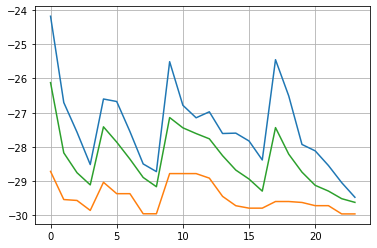

In [31]:
plt.figure()
plt.plot(range(24),Graph1)
plt.plot(range(24),Graph2)
plt.plot(range(24),Graph3)
plt.grid(True)
plt.show

In [9]:
def individual(number_of_genes, upper_limit, lower_limit):           #создание индивидуума
    individual=[[round(rnd()*(upper_limit-lower_limit)+lower_limit) 
                for x in range(number_of_genes)],
                [round(rnd()*(upper_limit-lower_limit)+lower_limit) 
                for x in range(number_of_genes)]]
    return individual 

def population(number_of_individuals,
               number_of_genes, upper_limit, lower_limit):           #создание начальной популяции
    return {NMSE(individual(number_of_genes, upper_limit, lower_limit)): individual(number_of_genes, upper_limit, lower_limit) 
        for x in range(number_of_individuals)}